In [33]:
import csv
import requests
import pandas as pd

# visualizations
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [36]:
API_URL = "https://api.covid19api.com/total/dayone/country/singapore"
# API_URL = "https://api.covid19api.com/country/singapore/status/confirmed"

# https://api.covid19api.com/live/country/singapore
# https://api.covid19api.com/webhook
#https://api.covid19api.com/total/dayone/country/south-africa
#https://api.covid19api.com/total/country/south-africa/status/confirmed?from=2020-03-01T00:00:00Z&to=2020-04-01T00:00:00Z

In [55]:
response = requests.get(API_URL)

In [56]:
# response.status_code

In [60]:
response_dict = json.loads(response.text)
response_dict = pd.DataFrame(response_dict)

In [62]:
df = response_dict.to_csv()

In [71]:
temp = response_dict[['Date', 'Confirmed', 'Deaths', 'Recovered']]

In [75]:
# temp['Date'].isnull().any()

False

In [78]:
# temp[temp['Date'].str.contains('2020-01-23')]

In [80]:
# temp['Date'] = pd.to_datetime(temp['Date'], errors='coerce')

In [81]:
from datetime import datetime as dt

In [42]:
with requests.Session() as s:
    download = s.get(CSV_URL)

    decoded_content = download.content.decode('utf-8')

    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    my_list = list(cr)[0]
#     for row in my_list:
#         print(row)
#         print("*"*10)

In [ ]:
tweets_data = tweets_data.dropna(subset=['tweet_time'])

In [82]:
temp['new_date'] = temp.Date.dt.strftime('%Y-%m-%d')

/var/folders/mv/c151lb7j7xx6ff_q9_85p_pc0000gn/T/ipykernel_41425/2664656312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['new_date'] = temp.Date.dt.strftime('%Y-%m-%d')


In [83]:
pd.DataFrame(my_list)
# my_list

,0
0,"[{""Country"":""Singapore"""
1,"CountryCode:""SG"""
2,"Province:"""""
3,"City:"""""
4,"CityCode:"""""
...,...
6725,"Lat:""1.35"""
6726,"Lon:""103.82"""
6727,Cases:257510
6728,"Status:""confirmed"""


In [92]:
# temp = temp.drop('Date', 1)
# temp.drop('temp', axis=1, inplace=True)

In [91]:
temp

,Confirmed,Deaths,Recovered,new_date
0,1,0,0,2020-01-23
1,3,0,0,2020-01-24
2,3,0,0,2020-01-25
3,4,0,0,2020-01-26
4,5,0,0,2020-01-27
...,...,...,...,...
666,248587,641,0,2021-11-19
667,250518,654,0,2021-11-20
668,252188,662,0,2021-11-21
669,253649,667,0,2021-11-22


In [99]:
t2 =pd.melt(temp, id_vars=['new_date'], value_vars=['Confirmed', 'Deaths', 'Recovered'],value_name="cases", var_name="case_type")
t2

,new_date,case_type,cases
0,2020-01-23,Confirmed,1
1,2020-01-24,Confirmed,3
2,2020-01-25,Confirmed,3
3,2020-01-26,Confirmed,4
4,2020-01-27,Confirmed,5
...,...,...,...
2008,2021-11-19,Recovered,0
2009,2021-11-20,Recovered,0
2010,2021-11-21,Recovered,0
2011,2021-11-22,Recovered,0


In [101]:
import seaborn as sns

<AxesSubplot:xlabel='new_date', ylabel='cases'>

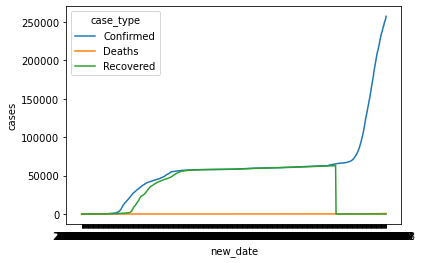

In [103]:
sns.lineplot(data=t2, x="new_date", y="cases", hue="case_type")

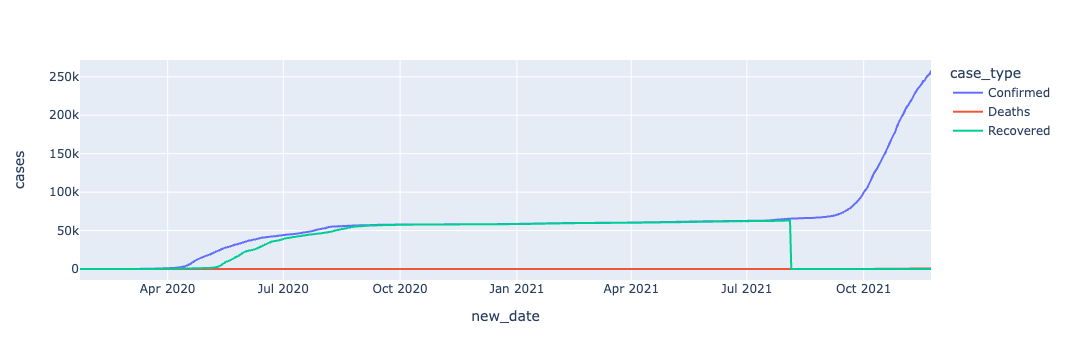

In [100]:
# df = px.data.gapminder().query("continent=='Oceania'")
fig = px.line(t2, x="new_date", y="cases", color='case_type')
fig.show()